<a href="https://colab.research.google.com/github/lmvu103/LSTM-Oil-Price-Prediction/blob/main/Phobet_Oil_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fbprophet
pip install plotly

In [3]:
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [23]:
#importing data from yahoo for 2017 to 2020
df = web.DataReader('BZ=F', data_source='yahoo', start='2015-01-01', end='2021-06-30')
df = df.reset_index()

In [24]:
#format date data to appropriate format
df['Date']=pd.to_datetime(df['Date'], format="%b %d, %Y") 
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2015-01-02,58.220001,55.520000,57.630001,56.419998,16707.0,56.419998
1,2015-01-05,56.290001,52.669998,56.290001,53.110001,30065.0,53.110001
2,2015-01-06,53.520000,50.529999,53.230000,51.099998,35494.0,51.099998
3,2015-01-07,51.840000,49.680000,51.060001,51.150002,37082.0,51.150002
4,2015-01-08,51.889999,49.820000,51.000000,50.959999,29469.0,50.959999
...,...,...,...,...,...,...,...
1613,2021-06-24,75.769997,74.519997,75.370003,75.559998,26664.0,75.559998
1614,2021-06-25,76.209999,74.949997,75.610001,76.180000,31417.0,76.180000
1615,2021-06-28,76.589996,74.519997,76.160004,74.680000,27711.0,74.680000
1616,2021-06-29,75.510002,73.910004,74.599998,74.760002,4089.0,74.760002


In [ ]:
df.shape

(3414, 7)

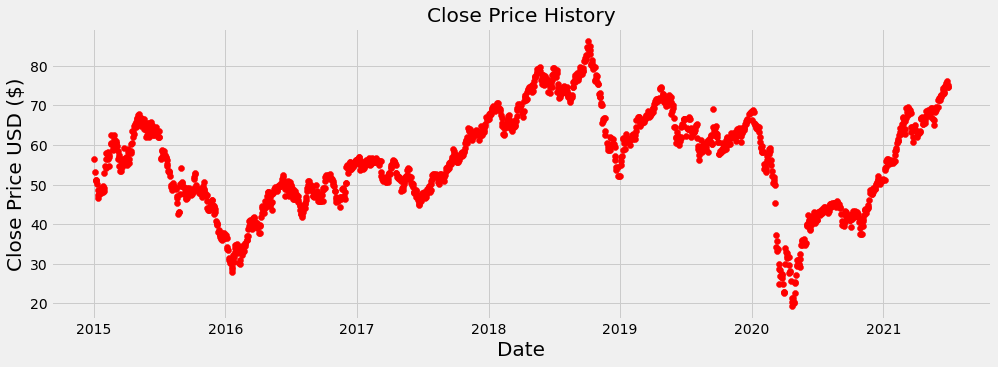

In [25]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.scatter(df['Date'],df['Close'],c='Red')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [26]:
train_dataset= pd.DataFrame()
train_dataset['ds'] = df['Date']
train_dataset['y']= df['Close']
train_dataset.head(2)

,ds,y
0,2015-01-02,56.419998
1,2015-01-05,53.110001


In [27]:
prophet_basic = Prophet()
prophet_basic.fit(train_dataset)
future = prophet_basic.make_future_dataframe(periods=365) #forecasting 365 days in future
forecast = Prophet(interval_width=0.95).fit(train_dataset).predict(future)
future.tail(2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1981,2022-06-29
1982,2022-06-30


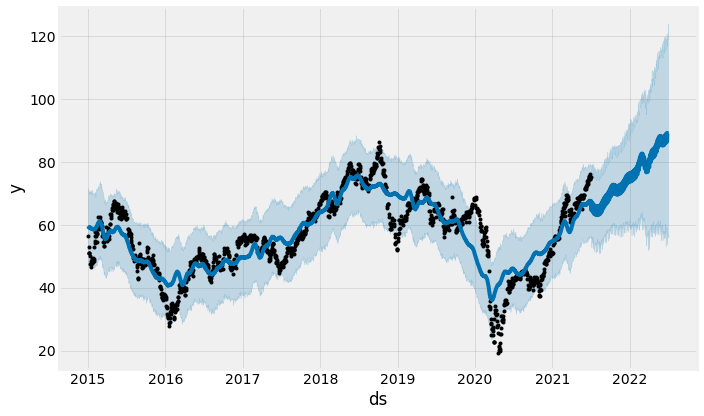

In [28]:
fig1 =prophet_basic.plot(forecast)

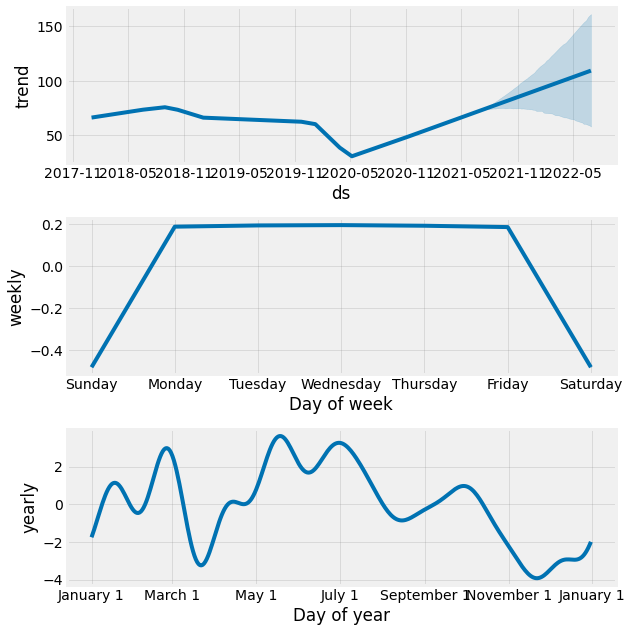

In [12]:
fig1 = prophet_basic.plot_components(forecast)

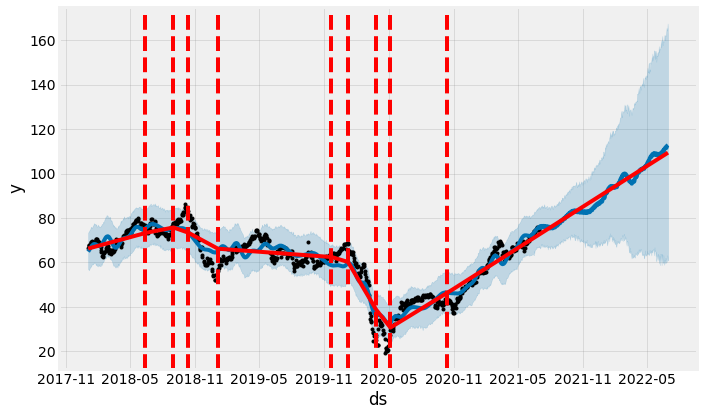

In [13]:
from fbprophet.plot import add_changepoints_to_plot
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


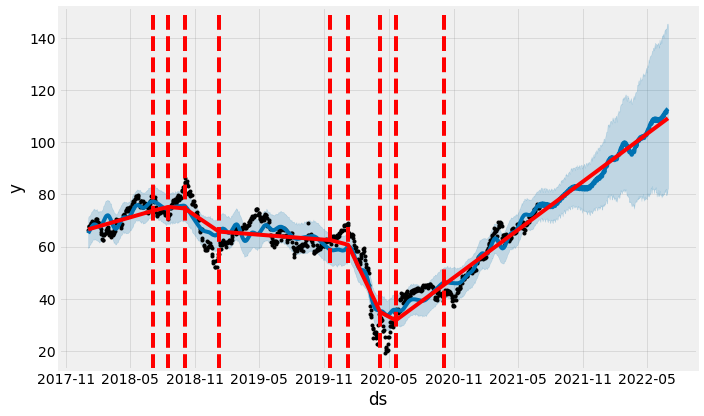

In [14]:
pro_change= Prophet(changepoint_range=0.9)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


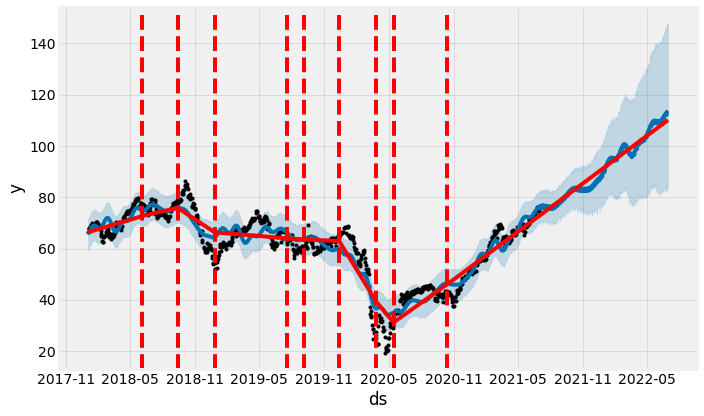

In [15]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True)
forecast = pro_change.fit(train_dataset).predict(future)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)
